In [1]:
from xmitgcm import open_mdsdataset
import xarray as xr
import numpy as np
import xgcm
import datetime
import os
from matplotlib import pyplot as plt 
from scipy import interpolate
import warnings; warnings.simplefilter('ignore')

from dask.distributed import Client
client = Client()
client

Client Scheduler: tcp://127.0.0.1:46415 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 9 Cores: 72 Memory: 134.72 GB


In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (13,9)
plt.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = False

run = 'doppi'


plot_dir = '/glade/u/home/myoungs/Figures/'+datetime.date.today().isoformat()+'/'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

#for x in run:
    ## read in data #######
      
data_dir = '/glade/p/univ/umit0025/newcarbon/'+run

print(data_dir)
    
   
ds = open_mdsdataset(data_dir,prefix=['DIAG','DIAGLayer','DIAGSurf','DIAGTracer'],delta_t=600)
                        # ignore_unknown_vars==True)#,iters='377225') # ,'DIAGTracer'
grid = xgcm.Grid(ds, periodic=['X'])

ds

/glade/p/univ/umit0025/newcarbon/doppi


<xarray.Dataset>
Dimensions:              (XC: 400, XG: 400, YC: 204, YG: 204, Z: 32, Zl: 32, Zp1: 33, Zu: 32, layer_1TH_bounds: 50, layer_1TH_center: 49, layer_1TH_interface: 48, time: 21)
Coordinates:
  * time                 (time) int64 39735360000 39893040000 ... 42888960000
    iter                 (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
  * XC                   (XC) >f4 5000.0 15000.0 25000.0 ... 3985000.0 3995000.0
  * YC                   (YC) >f4 5000.0 15000.0 25000.0 ... 2025000.0 2035000.0
  * XG                   (XG) >f4 0.0 10000.0 20000.0 ... 3980000.0 3990000.0
  * YG                   (YG) >f4 0.0 10000.0 20000.0 ... 2020000.0 2030000.0
  * Z                    (Z) >f4 -5.0 -15.0 -25.0 ... -3300.0 -3580.0 -3860.0
  * Zp1                  (Zp1) >f4 0.0 -10.0 -20.0 ... -3440.0 -3720.0 -4000.0
  * Zu                   (Zu) >f4 -10.0 -20.0 -30.0 ... -3440.0 -3720.0 -4000.0
  * Zl                   (Zl) >f4 0.0 -10.0 -20.0 ... -3160.0 -3440.0 -3720.0
    rA                   (YC, XC) >f4 dask.array<chunksize=(204, 400), meta=np.ndarray>
    dxG                  (YG, XC) >f4 dask.array<chunksize=(204, 400), meta=np.ndarray>
    dyG                  (YC, XG) >f4 dask.array<chunksize=(204, 400), meta=np.ndarray>
    Depth                (YC, XC) >f4 dask.array<chunksize=(204, 400), meta=np.ndarray>
    rAz                  (YG, XG) >f4 dask.array<chunksize=(204, 400), meta=np.ndarray>
    dxC                  (YC, XG) >f4 dask.array<chunksize=(204, 400), meta=np.ndarray>
    dyC                  (YG, XC) >f4 dask.array<chunksize=(204, 400), meta=np.ndarray>
    rAw                  (YC, XG) >f4 dask.array<chunksize=(204, 400), meta=np.ndarray>
    rAs                  (YG, XC) >f4 dask.array<chunksize=(204, 400), meta=np.ndarray>
    drC                  (Zp1) >f4 dask.array<chunksize=(33,), meta=np.ndarray>
    drF                  (Z) >f4 dask.array<chunksize=(32,), meta=np.ndarray>
    PHrefC               (Z) >f4 dask.array<chunksize=(32,), meta=np.ndarray>
    PHrefF               (Zp1) >f4 dask.array<chunksize=(33,), meta=np.ndarray>
    hFacC                (Z, YC, XC) >f4 dask.array<chunksize=(32, 204, 400), meta=np.ndarray>
    hFacW                (Z, YC, XG) >f4 dask.array<chunksize=(32, 204, 400), meta=np.ndarray>
    hFacS                (Z, YG, XC) >f4 dask.array<chunksize=(32, 204, 400), meta=np.ndarray>
    maskC                (Z, YC, XC) bool dask.array<chunksize=(32, 204, 400), meta=np.ndarray>
    maskW                (Z, YC, XG) bool dask.array<chunksize=(32, 204, 400), meta=np.ndarray>
    maskS                (Z, YG, XC) bool dask.array<chunksize=(32, 204, 400), meta=np.ndarray>
  * layer_1TH_bounds     (layer_1TH_bounds) >f4 0.0 0.1632653 ... 7.836735 8.0
  * layer_1TH_center     (layer_1TH_center) float32 0.08163265 ... 7.9183674
  * layer_1TH_interface  (layer_1TH_interface) >f4 0.1632653 ... 7.836735
Data variables:
    TRELAX               (time, YC, XC) float32 dask.array<chunksize=(1, 204, 400), meta=np.ndarray>
    oceTAUX              (time, YC, XG) float32 dask.array<chunksize=(1, 204, 400), meta=np.ndarray>
    DICTFLX              (time, YC, XC) float32 dask.array<chunksize=(1, 204, 400), meta=np.ndarray>
    DICCFLX              (time, YC, XC) float32 dask.array<chunksize=(1, 204, 400), meta=np.ndarray>
    DICVCFLX             (time, YC, XC) float32 dask.array<chunksize=(20, 204, 400), meta=np.ndarray>
    LaVH1TH              (time, layer_1TH_center, YG, XC) float32 dask.array<chunksize=(1, 49, 204, 400), meta=np.ndarray>
    LaHs1TH              (time, layer_1TH_center, YG, XC) float32 dask.array<chunksize=(1, 49, 204, 400), meta=np.ndarray>
    LaVa1TH              (time, layer_1TH_center, YG, XC) float32 dask.array<chunksize=(1, 49, 204, 400), meta=np.ndarray>
    LaUH1TH              (time, layer_1TH_center, YC, XG) float32 dask.array<chunksize=(1, 49, 204, 400), meta=np.ndarray>
    LaHw1TH              (time, layer_1TH_center, YC, XG) float32 dask.array<

# Make new dataset and save for the carbon parameters

I want time averaged DIC, Alk, Temp, pCO2 fluxes

Save them in a new folder so then I can load in in a different notebook

In [20]:
index = 1
winds = [0.05, 0.1, 0.15, 0.2, 0.25]

DIC = xr.DataArray(np.zeros((5, ds.time.shape[0], ds.Z.shape[0],
                                     ds.YC.shape[0], ds.XC.shape[0])),
                           coords=[winds, ds.time, ds.Z, ds.YC, ds.XC],
                           dims=['wind','time', 'Z', 'YC', 'XC'],name='vari')
Alk = xr.DataArray(np.zeros((5, ds.time.shape[0], ds.Z.shape[0],
                                     ds.YC.shape[0], ds.XC.shape[0])),
                           coords=[wind, ds.time, ds.Z, ds.YC, ds.XC],
                           dims=['wind','time', 'Z', 'YC', 'XC'],name='vari')
THETA = xr.DataArray(np.zeros((5, ds.time.shape[0], ds.Z.shape[0],
                                     ds.YC.shape[0], ds.XC.shape[0])),
                           coords=[wind, ds.time, ds.Z, ds.YC, ds.XC],
                           dims=['wind','time', 'Z', 'YC', 'XC'],name='vari')
DICCFLX = xr.DataArray(np.zeros((5, ds.time.shape[0],
                                     ds.YC.shape[0], ds.XC.shape[0])),
                           coords=[wind, ds.time,ds.YC, ds.XC],
                           dims=['wind','time', 'YC', 'XC'],name='vari')


DIC[index] = ds.TRAC01
Alk[index] = ds.TRAC02
THETA[index] = ds.THETA
DICCFLX[index] = ds.DICCFLX

DIC.to_netcdf(data_dir+'_DIC.nc')
Alk.to_netcdf(data_dir+'_Alk.nc')
THETA.to_netcdf(data_dir+'_THETA.nc')
DICCFLX.to_netcdf(data_dir+'_DICCFLX.nc')


PermissionError: [Errno 13] Permission denied: b'/glade/work/myoungs/newcarbon/dop_1_DIC.nc'

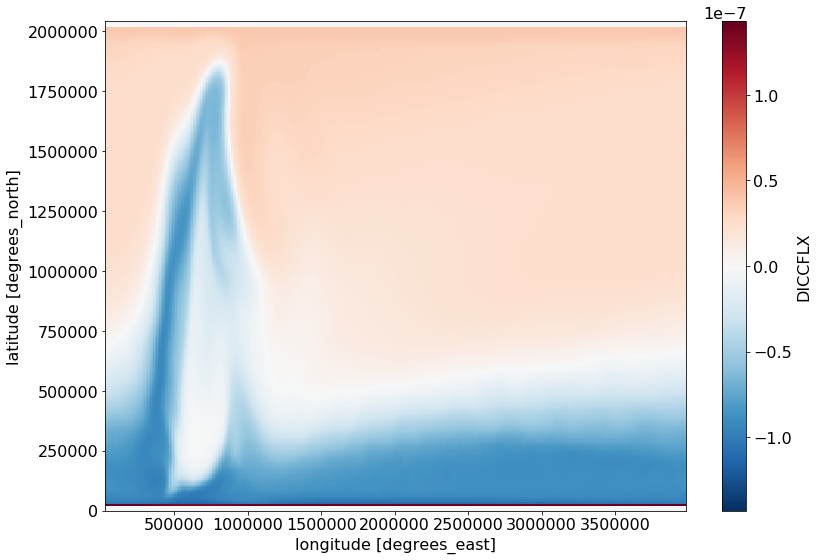

distributed.nanny - WARNING - Restarting worker


In [7]:
plt.figure()
ds.DICCFLX[:,:,3:-2].mean(dim=['time']).plot()
plt.savefig(plot_dir+'MeanCO2Flux'+run+'.eps')

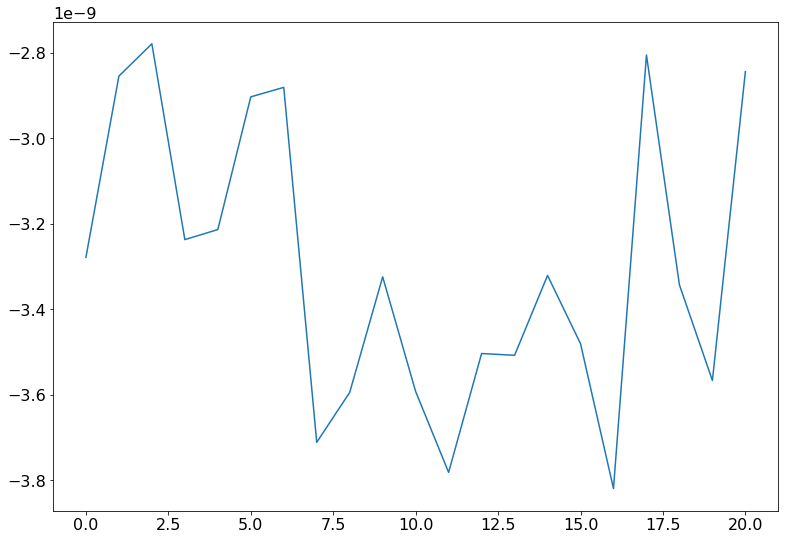

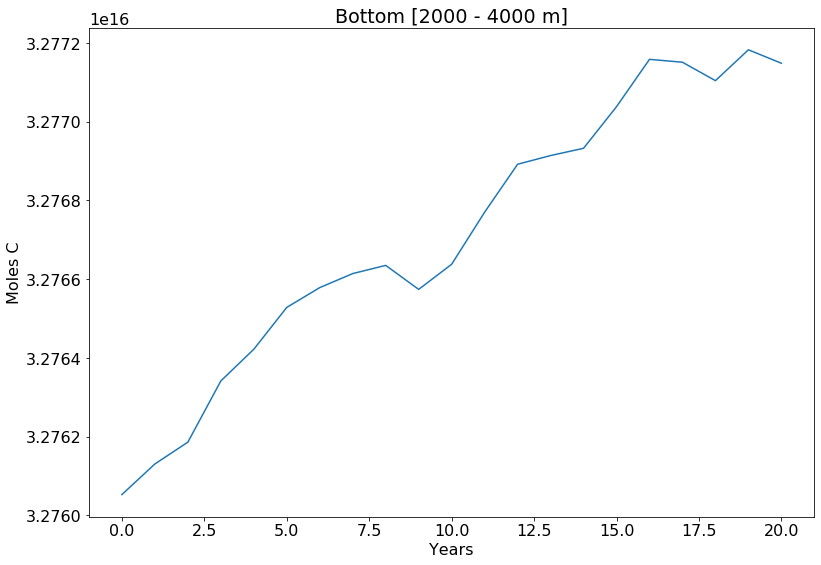

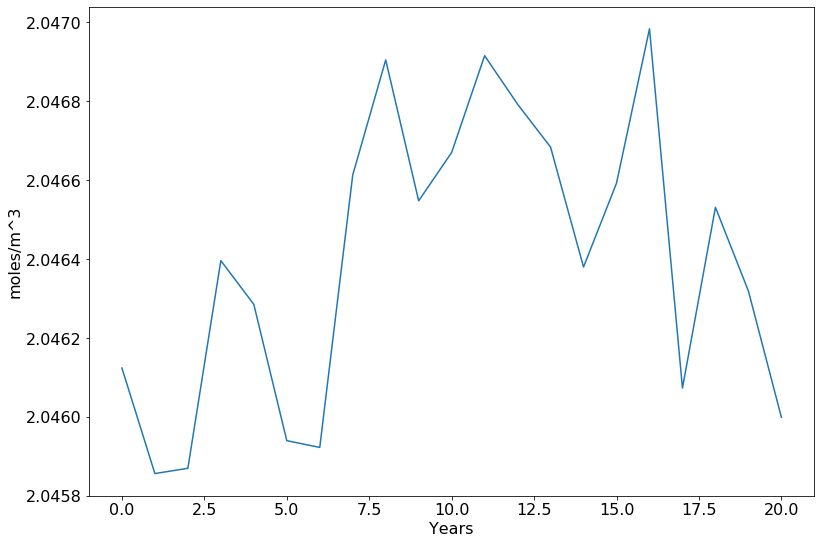

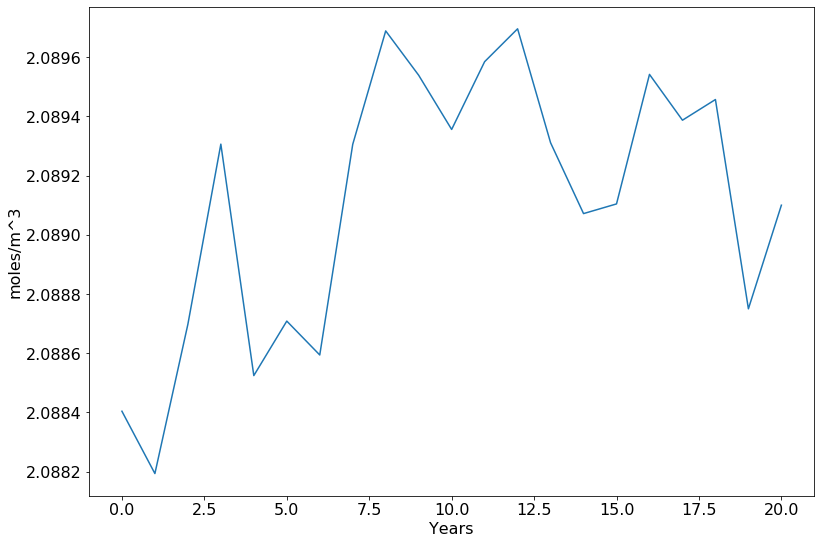

In [4]:
#cinvt = (ds.TRAC01.where(ds.TRAC01!=0).sum(dim = ['XC','YC'])*ds.dxC[0,0]*ds.dyC[0,0])
#csurf = (cinvt[:,0:10]*ds.drF[0:10]).sum(dim='Z')
#cdeep =  (cinvt[:,10:25]*ds.drF[10:25]).sum(dim='Z')
#cbottom = (cinvt[:,25:33]*ds.drF[25:33]).sum(dim='Z')



plt.figure()
plt.plot(cbottom)
plt.ylabel('Total Moles C')
plt.title('Bottom [2000 - 4000 m]')
plt.xlabel('Years')
plt.ylabel('Moles C')
plt.savefig(plot_dir+'IntegratedDICBot'+run+'.eps')

plt.figure()
plt.plot(ds.TRAC01[:,0].mean(dim=['YC','XC']))
plt.xlabel('Years')
plt.ylabel('moles/m^3')
plt.savefig(plot_dir+'MeanDICSurf'+run+'.eps')


plt.figure()
plt.plot(ds.TRAC01[:,10].mean(dim=['YC','XC']))
plt.xlabel('Years')
plt.ylabel('moles/m^3')
plt.savefig(plot_dir+'IntegratedDICDeep'+run+'.eps')

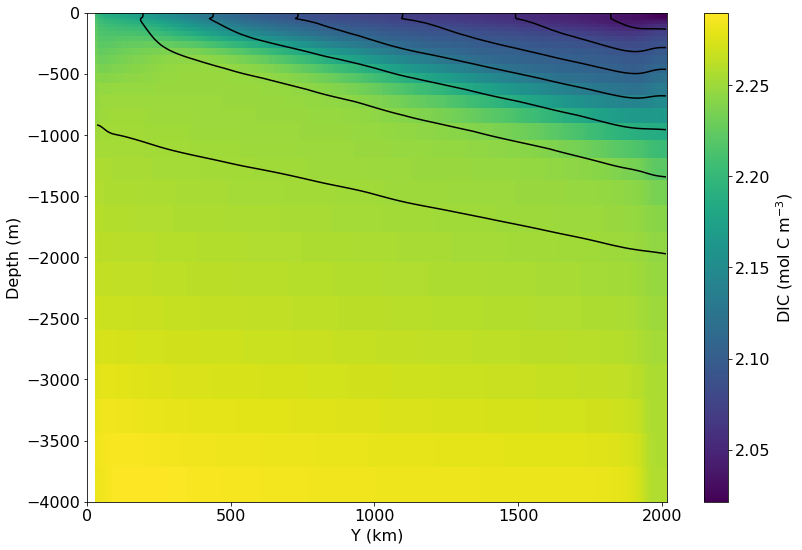

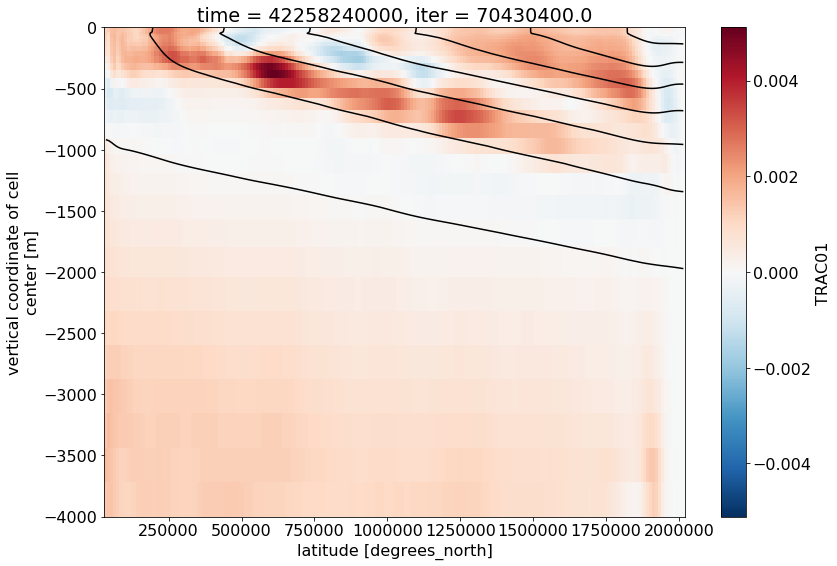

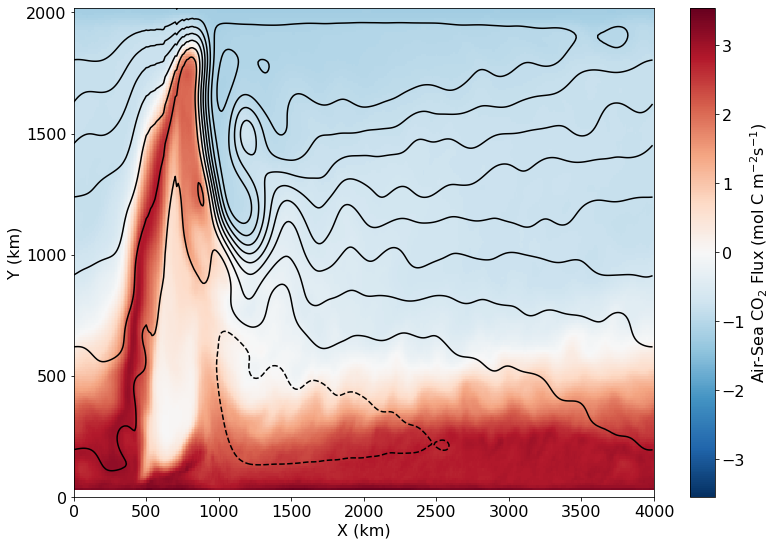

In [4]:
plt.figure()
c = (ds.TRAC01[-1,:,3:-2].where(ds.TRAC01[-1,:,3:-2]!=0).mean(dim='XC')).plot(cbar_kwargs={'label': 'DIC (mol C m$^{-3}$)'})
ds.THETA[-1,:,3:-2].mean(dim='XC').plot.contour(levels = [0,1,2,3, 4, 5, 6, 7, 8],colors = 'black')
plt.ylabel('Depth (m)')
plt.xticks([0,500000,1000000,1500000,2000000],[0,500,1000,1500,2000])
plt.title('')
plt.xlabel('Y (km)')





plt.savefig(plot_dir+'DIC'+run+'.eps')
#mol/m3

plt.figure()
(ds.TRAC01[-1,:,3:-2].where(ds.TRAC01[-1,:,3:-2]!=0).mean(dim='XC')-ds.TRAC01[0,:,2:-2].where(ds.TRAC01[0,:,3:-2]!=0).mean(dim='XC')).plot()
ds.THETA[-1,:,3:-2].mean(dim='XC').plot.contour(levels = [0,1,2,3, 4, 5, 6, 7, 8],colors = 'black')
plt.savefig(plot_dir+'ChangeDIC'+run+'.eps')

fig, ax = plt.subplots()
(ds.DICCFLX[-1,3:-2]*-3.15e7).plot(cbar_kwargs={'label': 'Air-Sea CO$_2$ Flux (mol C m$^{-2}$s$^{-1}$)'})
((ds.UVEL[-1,:-3]*ds.dyG*ds.drF[:-3]/1e6).sum(dim='Z').cumsum(dim='YC')).plot.contour(levels = 20,colors = 'black',linewidth=1)
plt.title('')
plt.yticks([0,500000,1000000,1500000,2000000],[0,500,1000,1500,2000])
plt.ylabel('Y (km)')
plt.xticks([0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000],[0,500,1000,1500,2000,2500,3000,3500,4000])
plt.xlabel('X (km)')

#rect = plt.Rectangle((400000, 500000), 800000, 1000000,
#                    edgecolor='k',linewidth=3,facecolor='none')
#rect2 = plt.Rectangle((3000000, 500000), 800000, 1000000,
#                    edgecolor='k',linewidth=3,facecolor='none')
#ax.add_patch(rect)
#ax.add_patch(rect2)

plt.savefig(plot_dir+'CO2Flux'+run+'.eps')
#mol/m2/sec

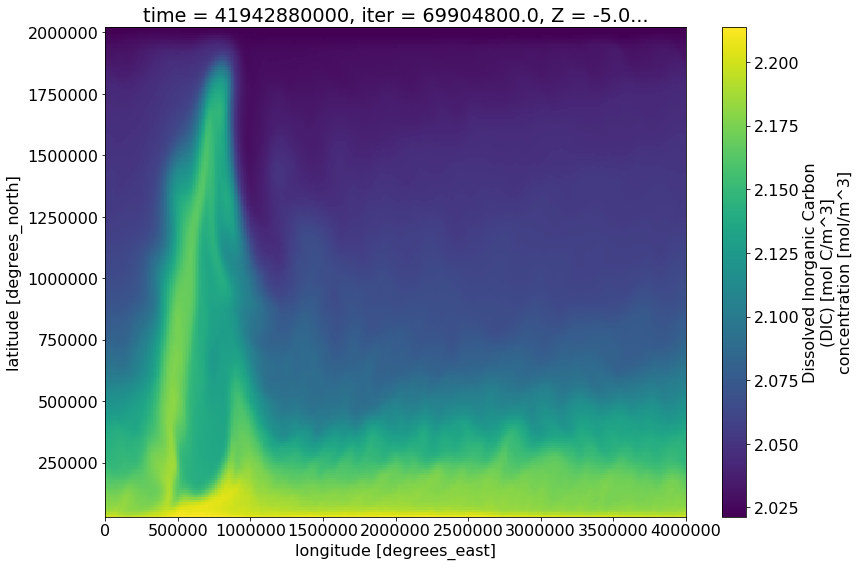

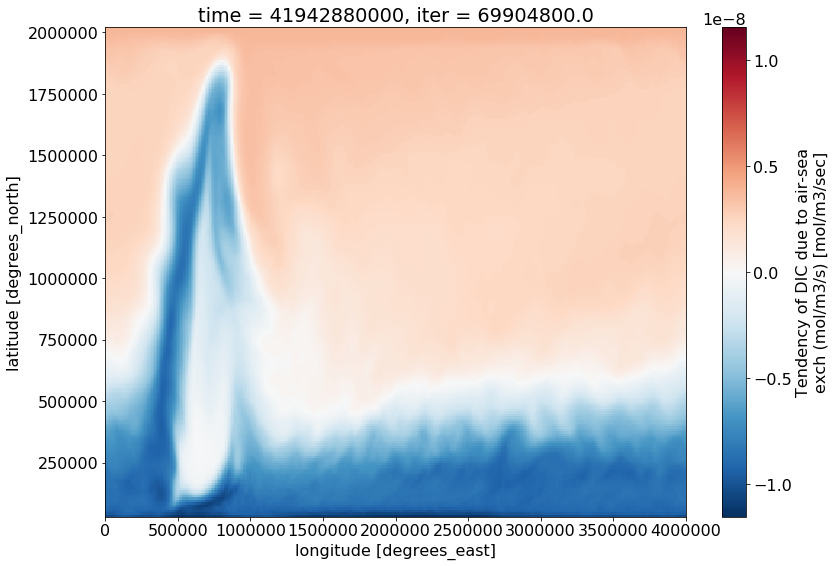

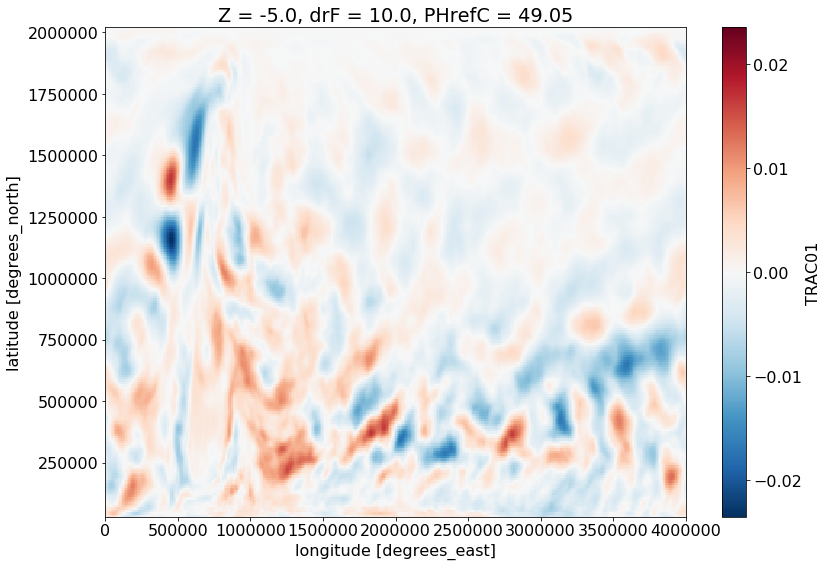

In [15]:
plt.figure()
ds.TRAC01[-1,0,3:-2].plot()
plt.savefig(plot_dir+'SurfDIC'+run+'.eps')

plt.figure()
ds.DICTFLX[-1,3:-2].plot()

plt.figure()
(ds.TRAC01[-1,0,3:-2]-ds.TRAC01[-5,0,3:-2]).plot()

In [7]:
### do analysis like Nikki suggested, analyzing the two different boxes near the ridge and far away from the ridge ###

### identify ridge box  500 km to 1500 km in y, 400 to 800 km in x
#plt.figure()
#(ds.DICCFLX[-1,53:-52,40:120]*-3.15e7).plot() 

### identify downstream box
#plt.figure()
#(ds.DICCFLX[-1,53:-52,300:380]).plot() 

### look at dic flux in box
DF = (ds.DICCFLX[-1,53:-52,40:120]*-3.15e7).mean(dim=['YC','XC'])-(ds.DICCFLX[-1,53:-52,300:380]*-3.15e7).mean(dim=['YC','XC'])


### calculate difference in DIC
DDIC = np.float(((ds.TRAC01[-1,0,53:-52,40:120]).mean(dim=['YC','XC'])-(ds.TRAC01[-1,0,53:-52,300:380]).mean(dim=['YC','XC']))*1e3)


### calculate difference in Alkalinity
DAlk = np.float(((ds.TRAC02[-1,0,53:-52,40:120]).mean(dim=['YC','XC'])-(ds.TRAC02[-1,0,53:-52,300:380]).mean(dim=['YC','XC']))*1e3)



### calculate difference in Temperature
DT = (ds.THETA[-1,0,53:-52,40:120]).mean(dim=['YC','XC'])-(ds.THETA[-1,0,53:-52,300:380]).mean(dim=['YC','XC'])


### calculate mean temperature
MT = (ds.THETA[-1,0]).mean(dim=['YC','XC'])
MT1 = ds.THETA[-1,0,53:-52,40:120].mean(dim=['YC','XC'])
MT2 = ds.THETA[-1,0,53:-52,300:380].mean(dim=['YC','XC'])

### calculate the mean DIC
MDIC = np.float((ds.TRAC01[-1,0]).mean(dim=['YC','XC']))*1e3
MDIC1 = np.float(ds.TRAC01[-1,0,53:-52,40:120].mean(dim=['YC','XC']))*1e3
MDIC2 = np.float(ds.TRAC01[-1,0,53:-52,300:380].mean(dim=['YC','XC']))*1e3


### calculate the mean alkalinity
MAlk = np.float((ds.TRAC02[-1,0]).mean(dim=['YC','XC']))*1e3
MAlk1 = np.float(ds.TRAC02[-1,0,53:-52,40:120].mean(dim=['YC','XC']))*1e3
MAlk2 = np.float(ds.TRAC02[-1,0,53:-52,300:380].mean(dim=['YC','XC']))*1e3

### calculate gammadic, gammaalk
gammaDIC = (3*MAlk*MDIC - 2*MDIC*MDIC)/(2*MDIC-MAlk)/(MAlk-MDIC)
gammaAlk = -(MAlk*MAlk)/(2*MDIC-MAlk)/(MAlk-MDIC)

### need biogeochemistry to calculate ocePCO2

MpCO2 = co3eq(MT, 35, 10, MAlk, MDIC)[0]

### calculate delta pc02 ocean
MpCO21 = co3eq(MT1, 35, 10,MAlk1 ,MDIC1)[0]
MpCO22 = co3eq(MT2, 35, 10,MAlk2, MDIC2)[0]

### calculate the terms
DICterm = gammaDIC*MpCO2/MDIC*DDIC
Alkterm = gammaAlk*MpCO2/MAlk*DAlk
Tterm = MpCO2*0.0423*DT
## display terms
print(np.array(MpCO21-MpCO22))
print(np.array(DICterm))
print(np.array(Alkterm))
print(np.array(Tterm))
print(np.array(Alkterm+DICterm+Tterm))

48.426575
99.28229
-28.955227
-8.645621
61.681435


# Function to calculate pCO2
From Riley Brady

Vectorize using apply_ufunc method

In [5]:
def co3eq(temp, s, z, alk, dic):
    """
    Calculates pCO2, pH, H2CO3*, HCO3, and CO3 concentrations.

    NOTE: Currently you have to do this for a single point at a time. Due to
    dependence on `np.roots`, it isn't extremely easy to vectorize, although
    I imagine it is possible if one spent a little time on it.

    Contact: Riley.Brady@colorado.edu


    Parameters
    ----------
    temp : float
        Temperature at location (degC)
    s : float
        Salinity at location (ppt)
    z : float
        Depth at location (m)
    alk : float
        Alkalinity at location (umol/kg)
    dic : float
        DIC at location (umol/kg)


    Returns
    -------
    pCO2 (uatm), pH, CO2 (umol/kg), HCO3 (umol/kg), CO3 (umol/kg) as floats.


    Reference
    ---------
    Emerson and Hedges 2008: Chemical Oceanography and the Marine Carbon Cycle.
    (4A 1.2)


    Example
    -------
    pco2, pH, CO2, HCO3, CO3 = co3eq(15, 35, 10, 2300, 2100)
    """
    # Conversions
    t = temp + 273.15
    Pr = z/10
    alk = alk * 1e-6
    dic = dic * 1e-6
    R = 83.131

    # Calculate total borate from chlorinity
    tbor = .000416 * s / 35

    # Calculate Henry's Law coefficient, K0 (Weiss, 1974)
    U1 = -60.2409 + 93.4517 * (100/t) + 23.3585*np.log(t/100)
    U2 = s * (.023517 - .023656 * (t/100) + .0047036 * (t/100)**2)
    KH = np.exp(U1 + U2)

    # Calculate KB from temp and salinity (Dickson, 1990)
    KB = np.exp((-8966.9 - 2890.53 * s**0.5 - 77.942 * s + 1.728 * s**1.5
                 - 0.0996 * s**2)/t + 148.0248 + 137.1942 * s**0.5 + 1.62142 * s
                 - (24.4344 + 25.085 * s**0.5 + 0.2474 * s) * np.log(t)
                 + 0.053105 * s**0.5 * t);

    # Calculate K1 and K2 (Luecker et al., 2000)
    K1 = 10**(-(3633.86/t - 61.2172 + 9.67770 * np.log(t) - 0.011555 * s
                + 0.0001152 * s**2))
    K2 = 10**(-(471.78/t + 25.92990 - 3.16967 * np.log(t) - 0.01781 * s
                + 0.0001122 * s**2))

    # Pressure variation of K1, K2, and KB (Millero, 1995)
    dvB = -29.48 + 0.1622 * temp - .002608 * (temp)**2
    dv1 = -25.50 + 0.1271 * temp
    dv2 = -15.82 - 0.0219 * temp
    dkB = -.00284
    dk1 = -.00308 + 0.0000877 * temp
    dk2 = .00113 - .0001475 * temp
    KB  = (np.exp(-(dvB / (R * t)) * Pr + (0.5 * dkB / (R * t)) * Pr**2)) * KB
    K1  = (np.exp(-(dv1 / (R * t)) * Pr + (0.5 * dk1 / (R * t)) * Pr**2)) * K1
    K2  = (np.exp(-(dv2 / (R * t)) * Pr + (0.5 * dk2 / (R * t)) * Pr**2)) * K2

    # Temperature dependence of KW (DOE, 1994)
    KW1 = 148.96502 - 13847.26 / t - 23.65218 * np.log(t)
    KW2 = (118.67 / t - 5.977 + 1.0495 * np.log(t)) * s**.5 - 0.01615 * s
    KW  = np.exp(KW1 + KW2)

    # solve for H ion (Zeebe and Wolf-Gladrow, 2000)
    a1 = 1
    a2 = (alk + KB + K1)
    a3 = (alk * KB - KB * tbor - KW + alk * K1 + K1 * KB + K1 * K2 - dic * K1)
    a4 = (-KW  * KB + alk * KB * K1 - KB * tbor * K1 - KW * K1 + alk * K1 * K2
          + KB * K1 * K2 - dic * KB * K1 - 2 * dic * K1 * K2)
    a5 = (-KW * KB * K1 + alk * KB * K1 * K2 - KW * K1 * K2 - KB * tbor * K1
          * K2 - 2 * dic * KB * K1 * K2)
    a6 = -KB * KW * K1 * K2
    p = [a1, a2, a3, a4, a5, a6]
    r = np.roots(p)
    h = np.max(np.real(r))

    # Calculate bicarbonate, carbonate, and aqueous CO2 usin DIC, Alk, and H+
    hco3 = dic / (1 + h/K1 + K2/h) * 1e6
    co3 = dic / (1 + h/K2 + h * h / (K1 * K2)) * 1e6
    co2 = dic / (1 + K1/h + K1 * K2 / (h * h)) * 1e6
    pco2 = co2 / KH
    pH = -np.log10(h)

    # Calculate B(OH)4 and OH
    BOH4 = KB * tbor / (h + KB)
    OH = KW / h

    # recalculate DIC and Alk to check calculations
    Ct = (hco3 + co3 + co2) * 1e6
    At = (hco3 + 2*co3 + BOH4 + OH - h) * 1e6

    return pco2, pH, co2, hco3, co3

## First attempt at plotting the carbon things by using averages over boxes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


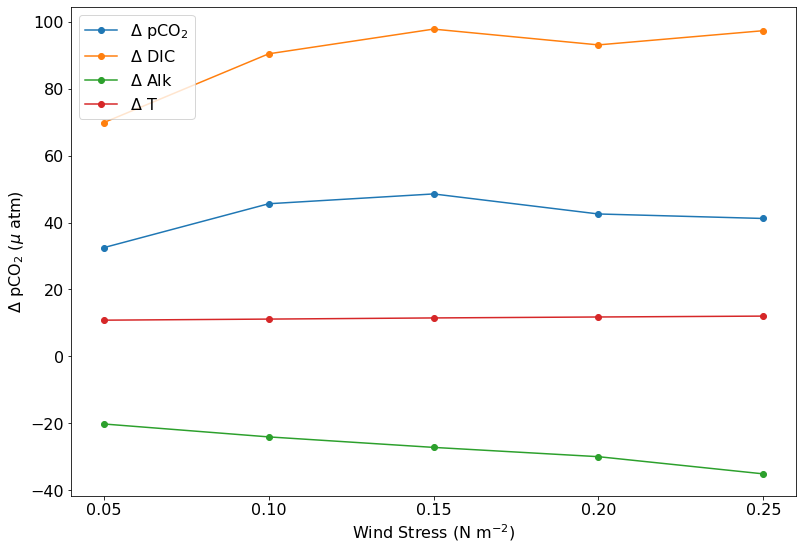

In [11]:
plt.figure()
wind = [0.05, 0.1, 0.15, 0.2, 0.25]
Dpco2 = [32.509293,45.6326, 48.56642, 42.577026, 41.232178]
DDIC = [69.89963, 90.459694, 97.85099, 93.12801, 97.37274]
DAlk = [-20.210583, -24.072533, -27.21059, -29.987167, -35.125328]
Dtemp = [10.8244,11.148662, 11.49376, 11.7771, 12.040306]

plt.plot(wind,Dpco2,'o-')
plt.plot(wind,DDIC,'o-')
plt.plot(wind,DAlk,'o-')
plt.plot(wind,Dtemp,'o-')

plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25])
plt.legend(['$\Delta$ pCO$_2$','$\Delta$ DIC','$\Delta$ Alk','$\Delta$ T'])
plt.xlabel('Wind Stress (N m$^{-2}$)')
plt.ylabel('$\Delta$ pCO$_2$ ($\mu$ atm)')

plt.savefig(plot_dir+'CO2Difference'+'.eps')

# Create data array for just the variables I need for this calculation versus wind

I want time averaged DIC, Alk, Temp, pCO2 fluxes

Save them in a new folder so then I can load in in a different notebook

In [27]:
wind[index]

0.05